In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('material_data.txt')
data

,Elements,Atomic_Number,Electronegativity,Atomic_Radius,Thermal_Conductivity,Density,Crystal_System
0,H,1,2.20,0.25,0.1805,0.09,HEX
1,He,2,0.00,1.20,0.1513,0.18,HCP
2,Li,3,0.98,1.45,85.0000,530.00,BCC
3,Be,4,1.57,1.05,190.0000,1850.00,HCP
4,B,5,2.04,0.85,27.0000,2340.00,RHO
...,...,...,...,...,...,...,...
90,U,92,1.38,1.75,27.0000,18950.00,ORTH
91,Np,93,1.36,1.75,6.0000,20200.00,ORTH
92,Pu,94,1.28,1.75,6.0000,19840.00,MON
93,Am,95,1.30,1.75,10.0000,13670.00,HCP


In [3]:
for i in data.columns:
    print(i, data[i].dtype) 

Elements object
Atomic_Number int64
Electronegativity float64
Atomic_Radius float64
Thermal_Conductivity float64
Density float64
Crystal_System object


# Normalizing the data

In [4]:
data = data[['Electronegativity', 'Atomic_Radius', 'Density', 'Thermal_Conductivity']]

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardize the features
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Apply PCA
pca = PCA()
data_pca = pca.fit_transform(data_standardized)

# Normalize the transformed features
scaler_pca = MinMaxScaler()
data_normalized_pca = scaler_pca.fit_transform(data_pca)

data=pd.DataFrame(data_normalized_pca, columns=['Electronegativity', 'Atomic_Radius', 'Density', 'Thermal_Conductivity'])
data


,Electronegativity,Atomic_Radius,Density,Thermal_Conductivity
0,0.817528,0.080231,0.374366,0.694952
1,0.259807,0.025388,0.543575,0.782250
2,0.344477,0.212992,0.612142,0.443457
3,0.546820,0.393159,0.749450,0.492883
4,0.632594,0.189693,0.379998,0.495577
...,...,...,...,...
90,0.236661,0.552660,0.066426,0.481104
91,0.224927,0.548823,0.000000,0.505274
92,0.215199,0.537514,0.014456,0.518756
93,0.243397,0.414823,0.151665,0.427338


# 1. Decision Tree

In [6]:
X_1 = data[['Electronegativity']]
X_2 = data[['Atomic_Radius']]
X_3 = data[['Density']]
X_4 = data[['Electronegativity', 'Atomic_Radius', 'Density']]
X = [X_1,X_2,X_3,X_4]
Plot_Name = ['Electronegativity', 'Atomic Radius', 'Density', 'Combined']
Y = data[['Thermal_Conductivity']]

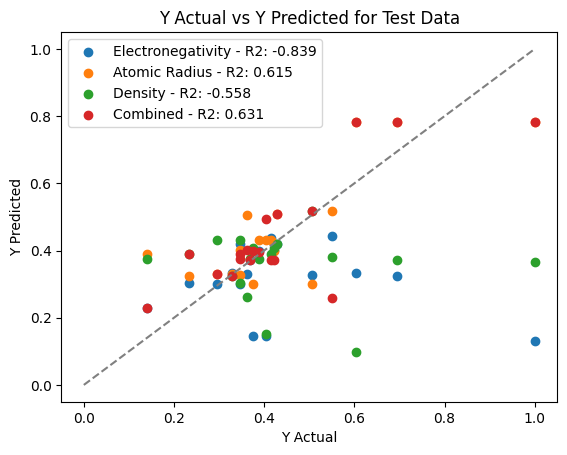

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

model = DecisionTreeRegressor()

for i in range(len(X)):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X[i], Y, test_size=0.20, random_state=96)
    
    model.fit(X_train,Y_train)
    
    Y_test_predicted = model.predict(X_test)
    plt.scatter(Y_test,Y_test_predicted, label=(f'{(Plot_Name[i])} - R2: {r2_score(Y_test,Y_test_predicted):.3f}'))
    plt.legend()

plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], '--', color='gray')
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.title('Y Actual vs Y Predicted for Test Data')
plt.show()

# Random Forest

c:\Users\manda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\manda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\manda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\manda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConvers

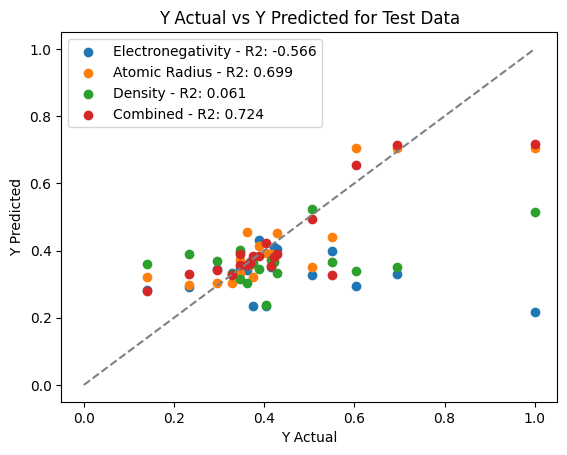

In [8]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

for i in range(len(X)):
    X_train, X_test, Y_train, Y_test = train_test_split(
        X[i], Y, test_size=0.20, random_state=96)
    
    model.fit(X_train,Y_train)
    
    Y_test_predicted = model.predict(X_test)
    plt.scatter(Y_test,Y_test_predicted, label=(f'{(Plot_Name[i])} - R2: {r2_score(Y_test,Y_test_predicted):.3f}'))
    plt.legend()

plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], '--', color='gray')
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.title('Y Actual vs Y Predicted for Test Data')
plt.show()